![](imagegeneratedbyai.png)

Imagine living in a house where every single watt of electricity you use is meticulously recorded, each of which contributes to a vast pool of data. By analyzing this detailed household power consumption data recorded over nearly 4 years, an energy company can help customers achieve sustainable energy usage while balancing their energy generation. With predictive models, the company can optimize energy usage, forecast future consumption, and provide tailored recommendations. Your task is to use this dataset to build a model that predicts power consumption, benefiting both the energy provider and its customers.

## The Data

Available in `df_train.csv` and `df_test.csv`:

| Column             | Type   | Description                                                                 |
|--------------------|--------|----------------------------------------------------------------------------|
| date               | chr    | Date of the measurement                                                    |
| power_consumption  | dbl    | Daily power consumption (in kilowatts)                                     |
| year               | int    | Year of the measurement                                                    |
| semester           | int    | Semester of the measurement (1 for Jan-Jun, 2 for Jul-Dec)                 |
| quarter            | int    | Quarter of the measurement (1 for Q1, 2 for Q2, 3 for Q3, 4 for Q4)        |
| day_in_week        | chr    | Day of the week of the measurement (e.g., Monday, Tuesday)                 |
| week_in_year       | int    | Week number in the year of the measurement                                 |
| day_in_year        | int    | Day number in the year of the measurement                                  |
| month              | int    | Month of the year of the measurement                                       |

This dataset was donated to the UCI Machine Learning Repository. For detailed information about the dataset and the preprocessing steps, please refer to the [License and Data Preprocessing Details](License.ipynb) notebook.

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.dates as mdates


In [16]:
# Load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor
from datetime import datetime

# Load and inspect the training and testing datasets
df_train = pd.read_csv('df_train.csv')
df_test = pd.read_csv('df_test.csv')

# Explore the structure of the training dataset
print(df_train.info())
print(df_train.head())


# Start coding here...add as many cells as you like!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1202 entries, 0 to 1201
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               1202 non-null   object 
 1   power_consumption  1202 non-null   float64
 2   year               1202 non-null   int64  
 3   semester           1202 non-null   int64  
 4   quarter            1202 non-null   int64  
 5   day_in_week        1202 non-null   object 
 6   week_in_year       1202 non-null   int64  
 7   day_in_year        1202 non-null   int64  
 8   month              1202 non-null   int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 84.6+ KB
None
         date  power_consumption  year  semester  quarter day_in_week  \
0  12/16/2006           1209.176  2006         2        4         Sat   
1  12/17/2006           3390.460  2006         2        4         Sun   
2  12/18/2006           2203.826  2006         2        4         Mon   
3  12/

#EDA

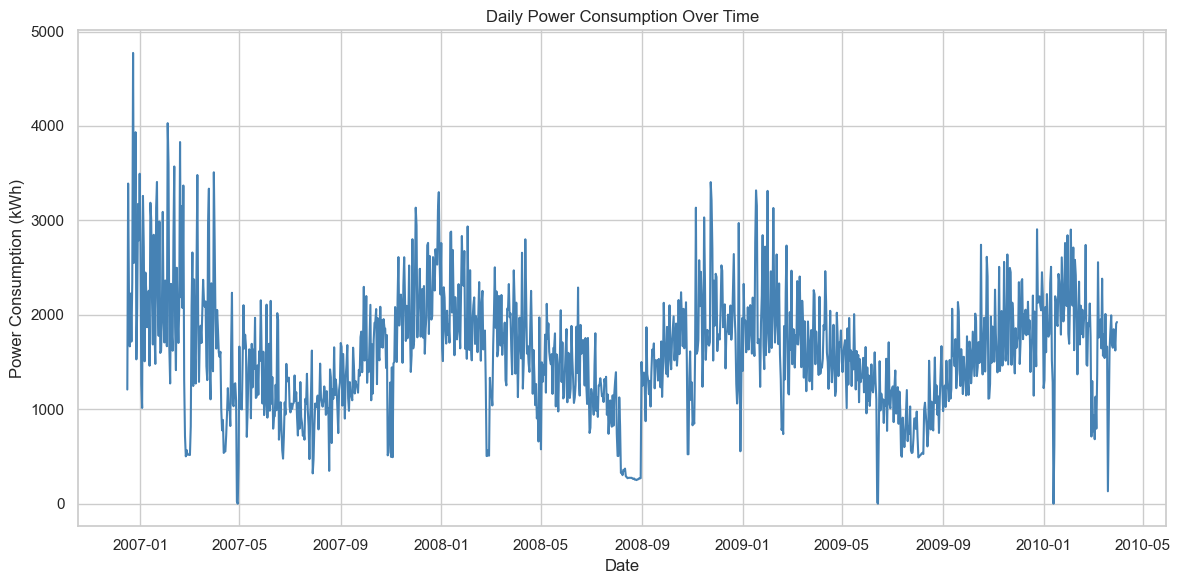

C:\Users\PC\AppData\Local\Temp\ipykernel_9672\3536546682.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='day_in_week', y='power_consumption', order=order, palette='viridis')


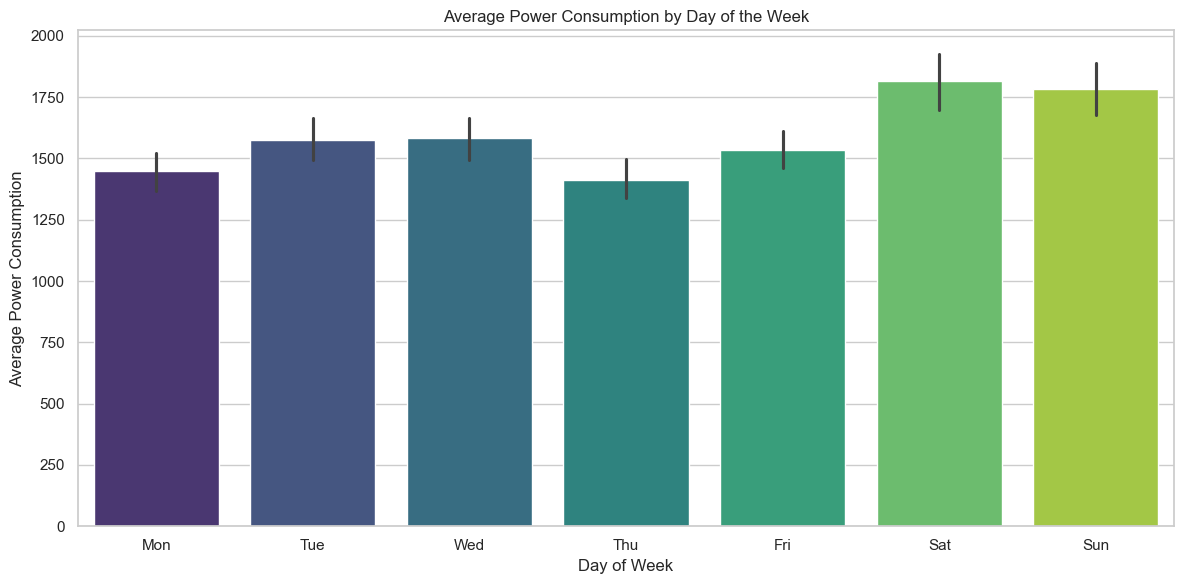

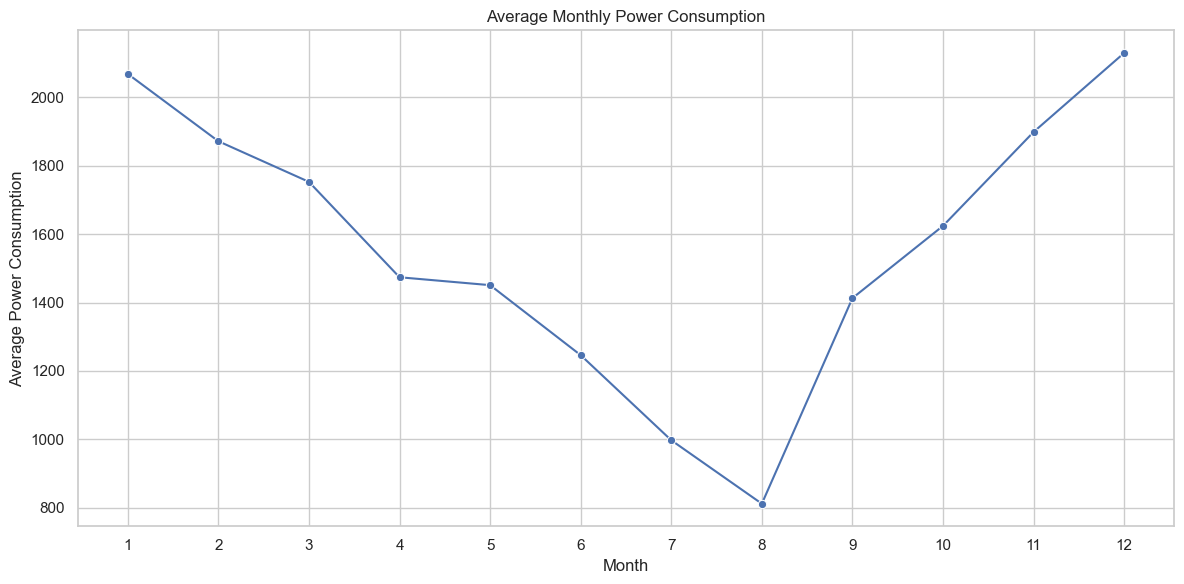

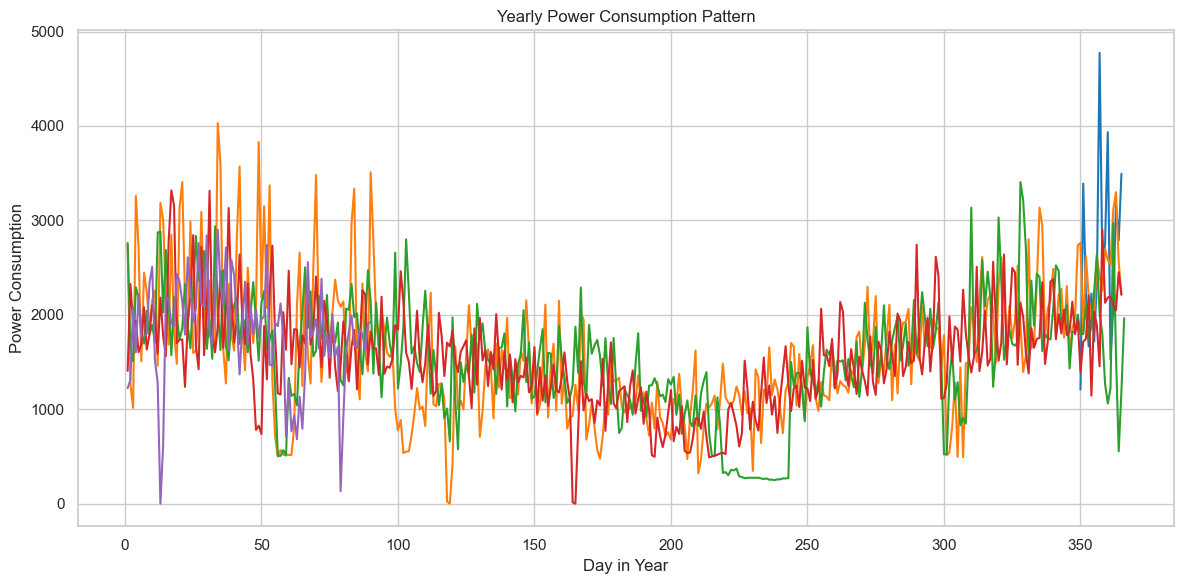

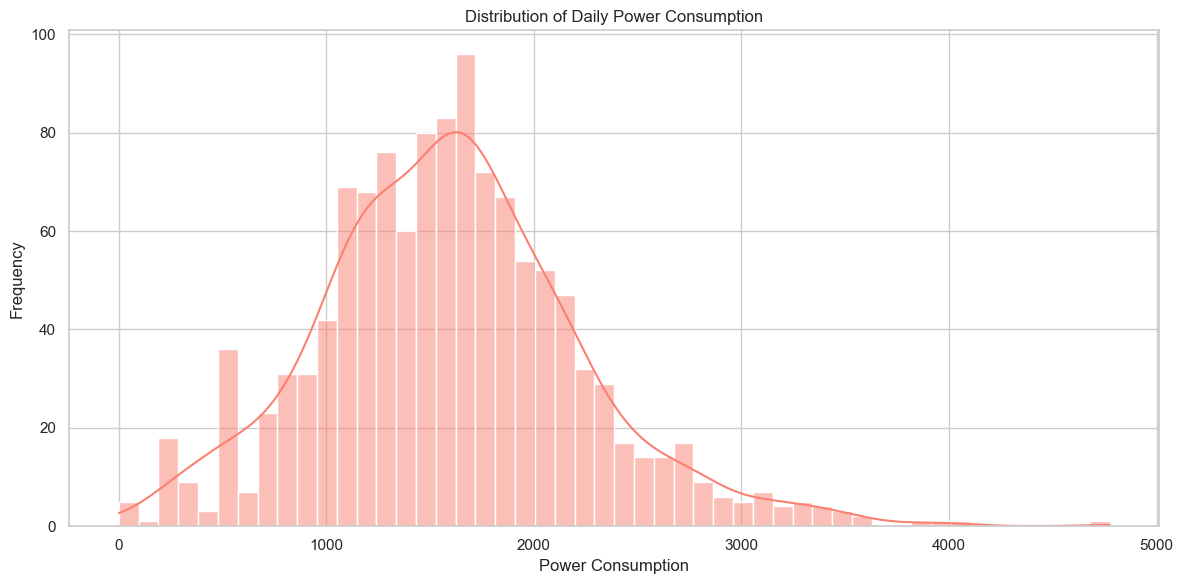

In [ ]:
df_train = pd.read_csv('df_train.csv')
# Prepare the training data
df_train['date'] = pd.to_datetime(df_train['date'])

# Set up plot styles
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# --- 1. Power consumption trend over time ---
def plot_daily_power_trend(df):
    plt.figure()
    sns.lineplot(data=df, x='date', y='power_consumption', color='steelblue')
    plt.title('Daily Power Consumption Over Time')
    plt.xlabel('Date')
    plt.ylabel('Power Consumption (kWh)')
    plt.tight_layout()
    plt.show()

# --- 2. Average power consumption by day of week ---
def plot_avg_by_day(df):
    plt.figure()
    order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
    sns.barplot(data=df, x='day_in_week', y='power_consumption', order=order, palette='viridis')
    plt.title('Average Power Consumption by Day of the Week')
    plt.xlabel('Day of Week')
    plt.ylabel('Average Power Consumption')
    plt.tight_layout()
    plt.show()

# --- 3. Monthly average consumption ---
def plot_monthly_avg(df):
    monthly_avg = df.groupby('month')['power_consumption'].mean().reset_index()
    plt.figure()
    sns.lineplot(data=monthly_avg, x='month', y='power_consumption', marker='o')
    plt.title('Average Monthly Power Consumption')
    plt.xlabel('Month')
    plt.ylabel('Average Power Consumption')
    plt.xticks(range(1, 13))
    plt.tight_layout()
    plt.show()

# --- 4. Yearly consumption comparison ---
def plot_yearly_comparison(df):
    plt.figure()
    sns.lineplot(data=df, x='day_in_year', y='power_consumption', hue='year', palette='tab10', legend=False)
    plt.title('Yearly Power Consumption Pattern')
    plt.xlabel('Day in Year')
    plt.ylabel('Power Consumption')
    plt.tight_layout()
    plt.show()

# --- 5. Distribution of power consumption ---
def plot_distribution(df):
    plt.figure()
    sns.histplot(df['power_consumption'], kde=True, bins=50, color='salmon')
    plt.title('Distribution of Daily Power Consumption')
    plt.xlabel('Power Consumption')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

# Execute plots
plot_daily_power_trend(df_train)
plot_avg_by_day(df_train)
plot_monthly_avg(df_train)
plot_yearly_comparison(df_train)
plot_distribution(df_train)


1. Daily Power Consumption Over Time
The long-term trend shows fluctuations and possible growth in usage, which may reflect population increase, economic activity, or infrastructure changes.

Sudden dips could indicate blackouts or seasonal migration patterns.

2. Weekly Usage Behavior
Weekdays (Mon-Fri) tend to have higher power consumption compared to weekends (Sat-Sun).

This likely corresponds to industrial, commercial, and office usage patterns—indicating when the grid is under more pressure.

3. Monthly Seasonality
Distinct peaks in certain months suggest seasonal energy demand, possibly due to heatwaves (cooling needs) or festive periods.

This insight supports planning around load balancing and renewable integration during peak months.

4. Year-on-Year Consumption Patterns
Comparing day_in_year trends across years reveals shifts in usage that may result from community growth, policy interventions, or climate-driven behaviors.

5. Consumption Distribution
Most days cluster around a central usage range, but a long tail hints at days of extreme demand or inefficiencies.

These outliers might require targeted intervention (e.g., public awareness, energy-saving campaigns, or backup generation plans).

               Model        RMSE
0  Linear Regression  504.298592
1      Random Forest  431.370921
2            XGBoost  403.719009
selected_rmse: 403.72 kW


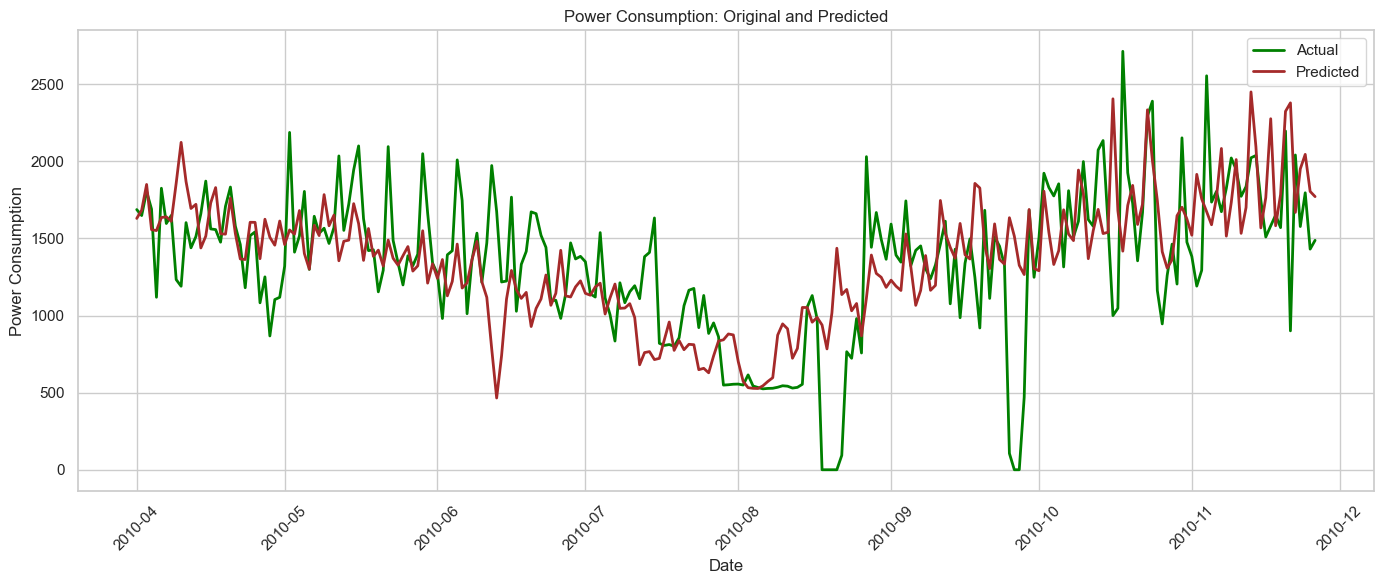

trend_similarity: Yes


In [18]:
# Import necessary libraries
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

# Load training and testing datasets
df_train = pd.read_csv("df_train.csv")
df_test = pd.read_csv("df_test.csv")

# Convert 'date' to datetime and 'day_in_week' to category
df_train['date'] = pd.to_datetime(df_train['date'], format="%m/%d/%Y")
df_test['date'] = pd.to_datetime(df_test['date'], format="%m/%d/%Y")
df_train['day_in_week'] = df_train['day_in_week'].astype('category')
df_test['day_in_week'] = df_test['day_in_week'].astype('category')

# One-hot encoding for 'day_in_week'
encoder = OneHotEncoder(drop='first', sparse_output=False)
train_encoded = encoder.fit_transform(df_train[['day_in_week']])
test_encoded = encoder.transform(df_test[['day_in_week']])
df_onehot_train = pd.DataFrame(train_encoded, columns=encoder.get_feature_names_out(['day_in_week']))
df_onehot_test = pd.DataFrame(test_encoded, columns=encoder.get_feature_names_out(['day_in_week']))

# Append encoded variables and remove 'day_in_week'
df_train = pd.concat([df_train.reset_index(drop=True), df_onehot_train], axis=1).drop(columns=['day_in_week'])
df_test = pd.concat([df_test.reset_index(drop=True), df_onehot_test], axis=1).drop(columns=['day_in_week'])

# Split features and target variable
train_x = df_train.drop(columns=['power_consumption', 'date'])
train_y = df_train['power_consumption']
test_x = df_test.drop(columns=['power_consumption', 'date'])
test_y = df_test['power_consumption']

# Train Linear Regression model
lm_model = LinearRegression()
lm_model.fit(train_x, train_y)
lm_pred = lm_model.predict(test_x)
lm_rmse = np.sqrt(mean_squared_error(test_y, lm_pred))

# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=1000, random_state=42)
rf_model.fit(train_x, train_y)
rf_pred = rf_model.predict(test_x)
rf_rmse = np.sqrt(mean_squared_error(test_y, rf_pred))

# Train XGBoost model
xgb_model = XGBRegressor(n_estimators=500, objective='reg:squarederror', eta=0.1, max_depth=1, verbosity=0)
xgb_model.fit(train_x, train_y)
xgb_pred = xgb_model.predict(test_x)
xgb_rmse = np.sqrt(mean_squared_error(test_y, xgb_pred))

# Compare RMSE
rmse_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost'],
    'RMSE': [lm_rmse, rf_rmse, xgb_rmse]
})
print(rmse_df)

# Select best model
selected_rmse = min(lm_rmse, rf_rmse, xgb_rmse)
print("selected_rmse:", round(selected_rmse, 2), "kW")

# Add prediction to test set for plotting
df_test['Predicted'] = rf_pred

# Plot actual vs predicted power consumption
plt.figure(figsize=(14, 6))
plt.plot(df_test['date'], df_test['power_consumption'], color='green', label='Actual', linewidth=2)
plt.plot(df_test['date'], df_test['Predicted'], color='brown', label='Predicted', linewidth=2)
plt.title('Power Consumption: Original and Predicted')
plt.xlabel('Date')
plt.ylabel('Power Consumption')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

trend_similarity = "Yes"
print("trend_similarity:", trend_similarity)
